In [4]:
!pip install requests supervision inference

  Using cached supervision-0.25.1-py3-none-any.whl.metadata (14 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached aiortc-1.9.0-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached APScheduler-3.11.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached asyncua-1.1.5-py3-none-any.whl.metadata (9.5 kB)
  Using cached Cython-3.0.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.2 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached fastapi-0.110.3-py3-none-any.whl.metadata (24 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.ma

In [5]:
from io import BytesIO

import requests
import supervision as sv
from inference import get_model
from PIL import Image
from PIL.ImageFile import ImageFile


def load_image_from_url(url: str) -> ImageFile:
    response = requests.get(url)
    response.raise_for_status()  # check if the request was successful
    image = Image.open(BytesIO(response.content))
    return image

In [ ]:
detections[1]

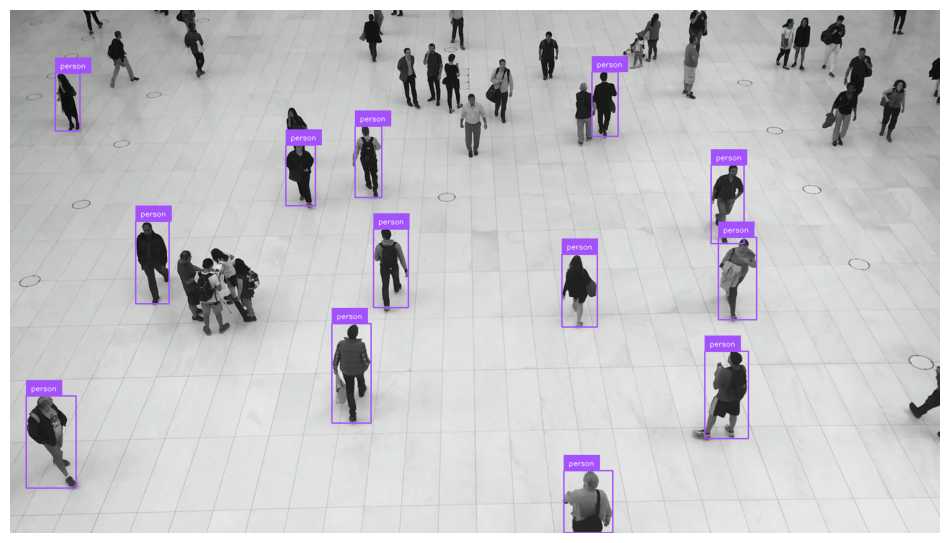

In [6]:
# load the image from an url
image = load_image_from_url("https://media.roboflow.com/inference/people-walking.jpg")

# load a pre-trained yolov8n model
model = get_model(model_id="yolov11n-1280")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)

In [ ]:
annotated_image

AttributeError: 'JpegImageFile' object has no attribute 'shape'